In [ ]:
!git clone https://github.com/ethantornga/DataAnalyticsCapstone.git

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import itertools as it
import collections as co
import time

from sklearn import datasets, metrics, neighbors, naive_bayes, linear_model, dummy, pipeline, feature_selection as ftr_sel, model_selection as skms, preprocessing as skpre
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import tree, svm, ensemble as ens
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, ParameterGrid
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer

from scipy.stats import zscore
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#1. Load the Data

data = "/content/DataAnalyticsCapstone/mba_decision_new.csv"
df = pd.read_csv(data)

print(df.head())

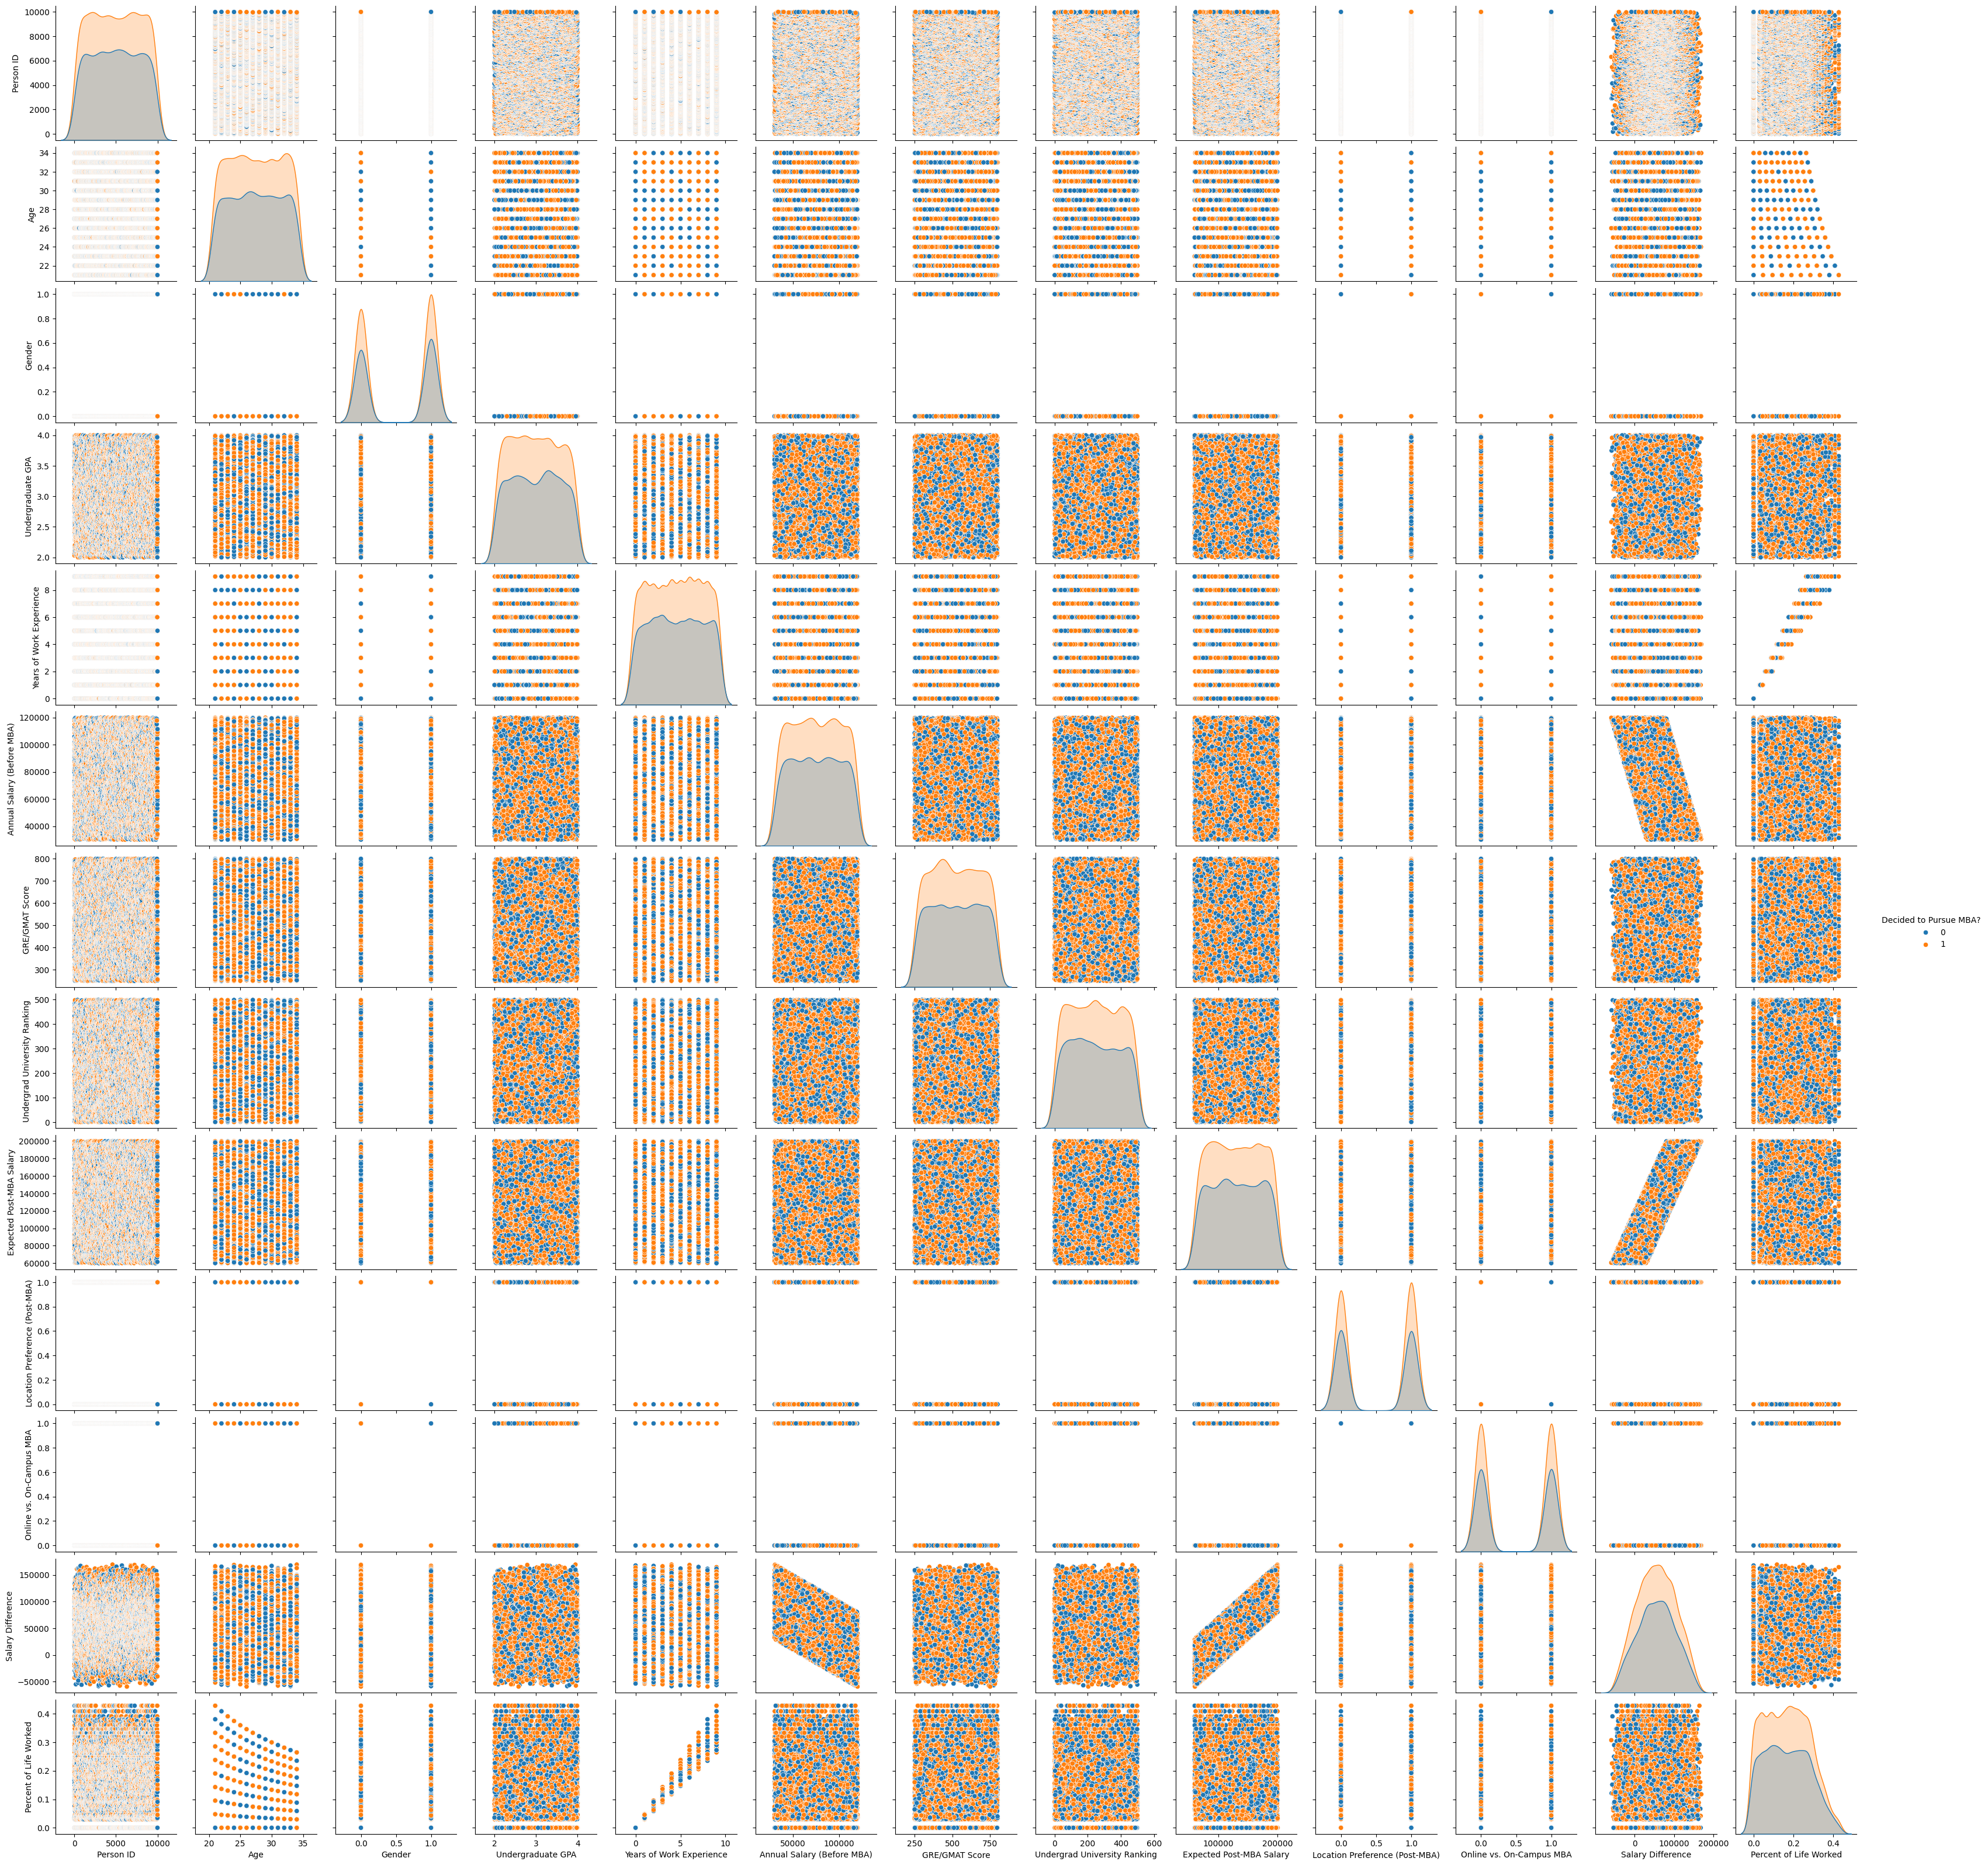

In [53]:
sns.pairplot(df, hue='Decided to Pursue MBA?', diag_kind='kde')

In [ ]:
#2. Data Cleaning/Preprocessing

#Missing Values (None)
missing_values = df.isnull().sum()
print(missing_values)

#Detecting Outliers w/ z-score (None)
z_scores = df.select_dtypes(include=['float64', 'int64']).apply(zscore)

outliers = df[(z_scores > 3).any(axis=1)]
print("\nOutliers using Z-Score:\n", outliers)

#Encoding (Dummy Variables)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Online vs. On-Campus MBA'] = df['Online vs. On-Campus MBA'].map({'Online': 0, 'On-Campus': 1})
df['Location Preference (Post-MBA)'] = df['Location Preference (Post-MBA)'].map({'Domestic': 0, 'International': 1})
df['Decided to Pursue MBA?'] = df['Decided to Pursue MBA?'].map({'No': 0, 'Yes': 1})


In [ ]:
#3. Feature Engineering

#Creating training and testing splits in the data
(data_train_ftrs, data_test_ftrs,
data_train_tgt, data_test_tgt) = skms.train_test_split(df.drop('Decided to Pursue MBA?', axis=1),
                                                      df['Decided to Pursue MBA?'],
                                                      test_size=.30,
                                                      random_state=42)
#Shape of train/test features
print("Train features shape:", data_train_ftrs.shape)
print("Test features shape:", data_test_ftrs.shape)

Train features shape: (7000, 19)
Test features shape: (3000, 19)


In [ ]:
# DataFrame Correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                Person ID       Age    Gender  \
Person ID                        1.000000  0.006182 -0.009546   
Age                              0.006182  1.000000  0.008173   
Gender                          -0.009546  0.008173  1.000000   
Undergraduate GPA                0.004599  0.014800  0.010820   
Years of Work Experience         0.002018 -0.000798 -0.003348   
Annual Salary (Before MBA)       0.001637  0.011386 -0.007751   
GRE/GMAT Score                   0.021121  0.002036 -0.002195   
Undergrad University Ranking     0.006243 -0.003281 -0.014502   
Expected Post-MBA Salary         0.002500  0.016200 -0.008484   
Location Preference (Post-MBA)  -0.008117  0.008160  0.008357   
Online vs. On-Campus MBA         0.007276  0.015975  0.011154   
Decided to Pursue MBA?           0.001799  0.000614 -0.004653   
Salary Difference                0.001241  0.007617 -0.003031   
Percent of Life Worked          -0.000807 -0.226782 -0.007322   

                        

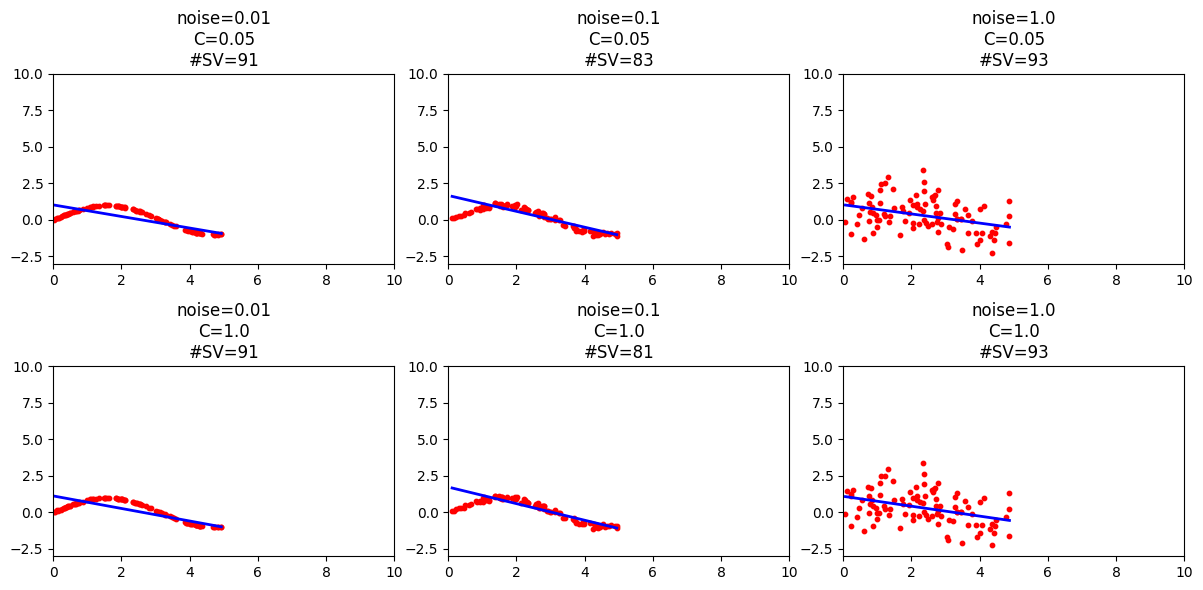

In [ ]:
# Function to simulate data
def generate_data(noise_level, n_samples = 100):
  X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
  y = np.sin(X).ravel()
  y += noise_level * np.random.randn(n_samples)
  return X, y

# Function to show SVR with penalty and noise
def show_svr_penalty_noise():
  fig, axes = plt.subplots(2, 3,figsize=(12,6))
  noise_levels = [0.01, 0.1, 1.0]
  C_values = [0.05, 1.0]

  for i, noise in enumerate(noise_levels):
    X, y = generate_data(noise)

    for j, C in enumerate(C_values):
      svr = SVR(kernel='linear', C=C)
      svr.fit(X, y)
      y_pred = svr.predict(X)

      ax = axes[j, i]
      ax.scatter(X, y, color = 'red', s=10, label="Data with noise")
      ax.plot(X, y_pred, color='blue', linewidth=2, label="SVR fit")
      ax.set_title(f"noise={noise}\nC={C}\n#SV={len(svr.support_)}")
      ax.set_xlim(0, 10)
      ax.set_ylim(-3, 10)

  plt.tight_layout()
  plt.show

show_svr_penalty_noise()

In [ ]:
#DECISION TREE